In [1]:
import numpy as np
import pandas as pd
import gensim.downloader as api
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [14]:
b_pandas = []
r_dtypes = {"business_id": np.str,
            "name": np.str, 
            "address": np.str, 
            "city": np.str, 
            "state": np.str, 
            "postal code": np.str, 
            "latitude": np.float16, 
            "longitude": np.float16, 
            "stars": np.float16, 
            "review_count": np.int32,
            "is_open": np.int32,
            "attributes": dict,
            "categories": np.ndarray
           }
with open("/Users/jeremyyeung/Downloads/yelp_dataset/yelp_academic_dataset_business.json", "r") as f:
    reader = pd.read_json(f, orient="records", lines=True, 
                          dtype=r_dtypes, chunksize=1000)
        
    for chunk in reader:
#         reduced_chunk = chunk.drop(columns=['latitude', 'longitude', 'address', 'city', 'state'])
        b_pandas.append(chunk)
    
full_business = pd.concat(b_pandas, ignore_index=True)

unique_attr = set()
for d in full_business[full_business.categories.str.contains('Restaurants', na=False)].attributes.dropna():
    for k in d.keys():
        unique_attr.add(k)

In [15]:
full_business.shape
restaurants = full_business[full_business.categories.str.contains('Restaurants', na=False)]

In [17]:
restaurants.to_json('restaurants.json', orient='records', lines=True)

In [60]:
attr_names = {'Insurance',
 'Ages',
 'Alcohol',
 'Ambience',
 'BYOB',
 'BYOB Corkage',
 'Best Nights',
 'Bike Parking',
 'Bitcoin',
 'Credit Cards',
 'Business Parking',
 'Appointment',
 'Caters',
 'Coat',
 'Corkage',
 'Dietary Restrictions',
 'Dogs',
 'Drive Thru',
 'Dancing',
 'Kids',
 'Meal',
 'Happy Hour',
 'TV',
 'Music',
 'Noise',
 'Outdoor',
 'Attire',
 'Counter',
 'Delivery',
 'Groups',
 'Range',
 'Reservations',
 'Table Service',
 'Take Out',
 'Smoking',
 'Wheelchair',
 'WiFi'}
# '24 Hours', removed because not in pretrained model

In [5]:
# load huge pretrained word2vec model
wv = api.load('word2vec-google-news-300')

[==========================------------------------] 53.0% 881.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========================-----------------------] 54.9% 912.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============================----------------------] 57.9% 962.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============================---------------------] 59.6% 991.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==============================--------------------] 61.4% 1020.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================================------------------] 65.0% 1080.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================================-----------------] 66.8% 1110.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================================----------------] 68.6% 1141.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[====================================--------------] 72.1% 1198.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[====================================--------------] 73.9% 1228.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=====================================-------------] 75.9% 1262.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========================================----------] 80.4% 1337.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=========================================---------] 82.3% 1368.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============================================-----] 90.6% 1507.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============================================---] 95.3% 1585.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================================================--] 97.5% 1620.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================================================-] 99.2% 1650.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [65]:
# assign vectors to each attribute in the form of {attr : vector}
attr_vec = {}
for attr in attr_names:
    lst = attr.split(' ')
    word_vec = np.zeros(300)
    for word in lst:
        word_vec = word_vec + wv[word] # combine word vectors if it is a phrase
    attr_vec[attr] = word_vec

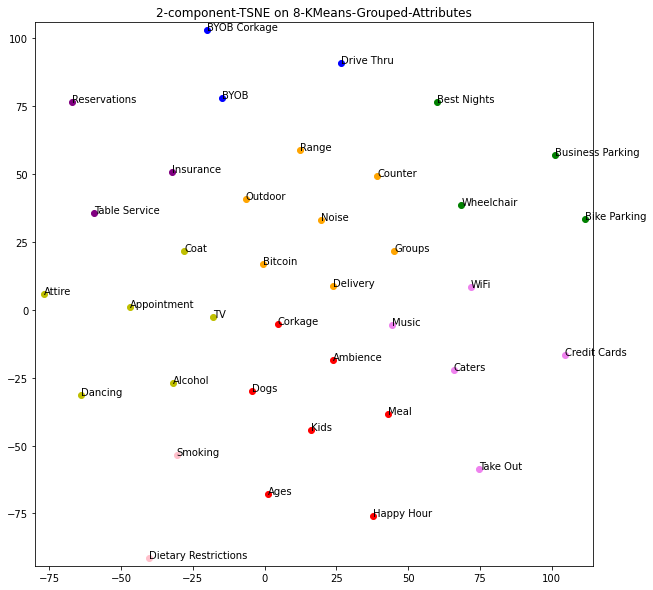

In [103]:
# differentiate colors for different groups in KMeans
color_dict = {0: 'r',
             1: 'orange',
             2: 'y',
             3: 'g',
             4: 'b',
             5: 'violet',
             6: 'pink',
             7: 'purple'}

# pass into TSNE
X = np.array(list(attr_vec.values())) # vectors
word_labels = list(attr_vec.keys()) # attribute labels
X_embedded = TSNE(n_components=2, random_state=0).fit_transform(X)

# plot the embedding in 2D space
x_coords = X_embedded[:, 0]
y_coords = X_embedded[:, 1]
plt.figure(figsize=(10, 10))

# plot points with colors corresponding to KMeans grouping
kmeans = KMeans(n_clusters=8, random_state=0).fit(X_embedded)
# kmeans.labels_ # use to find out which group each point in the cluster belongs to
for count, tup in enumerate(zip(x_coords, y_coords)):
    x, y = tup
    plt.scatter([x], [y], color=color_dict[kmeans.labels_[count]])
    
# annotate the points
for label, x, y in zip(word_labels, x_coords, y_coords):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.xlim(x_coords.min()-3, x_coords.max()+3)
plt.ylim(y_coords.min()-3, y_coords.max()+3)
plt.title('2-component-TSNE on 8-KMeans-Grouped-Attributes')
plt.show()